In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
score_df = pd.read_csv('csat_score_data.csv')
score_df.shape

(500, 13)

In [3]:
score_df.head(3)

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION
0,1,5,San Francisco,0,1.0,2020-02-27 07:04:04.176 +0000,2020-03-04,7,Regular,9,Repeat,0,0
1,2,4,Seattle,3,2.5,2020-02-26 18:32:53.664 +0000,2020-03-03,6,Instant Fully Paid,31,Search,0,0
2,3,5,San Francisco,1,1.0,2020-03-01 02:03:53.280 +0000,2020-03-04,5,Regular,33,B2B,0,0


In [4]:
score_df.tail(3)

,LEASE_ID,CSAT_RATING,ATLAS_REGION,BEDROOMS,BATHROOMS,FIRST_LEASE_APPROVED_AT,LEASE_START,LEAD_DAYS,BOOKING_TYPE,LOS,SOURCE_CATEGORY,HAS_EXTENSION,HAS_RELOCATION
497,498,3,Washington DC,0,1.0,2021-06-29 16:22:03.745 +0000,2021-07-06,7,Bookings V3,30,Search,0,0
498,499,4,Washington DC,1,1.0,2020-12-02 16:26:49.984 +0000,2021-03-02,90,Invitation V3,145,Search,1,0
499,500,5,Los Angeles,2,2.5,2020-10-26 21:18:21.378 +0000,2020-11-21,26,Bookings V3,246,Search,1,0


In [5]:
score_df.dtypes

LEASE_ID                     int64
CSAT_RATING                  int64
ATLAS_REGION                object
BEDROOMS                     int64
BATHROOMS                  float64
FIRST_LEASE_APPROVED_AT     object
LEASE_START                 object
LEAD_DAYS                    int64
BOOKING_TYPE                object
LOS                          int64
SOURCE_CATEGORY             object
HAS_EXTENSION                int64
HAS_RELOCATION               int64
dtype: object

In [6]:
score_df["LEASE_END"] = (
    pd.to_datetime(score_df["LEASE_START"]) + pd.to_timedelta(score_df["LOS"], unit="D")
)
score_df.dtypes

LEASE_ID                            int64
CSAT_RATING                         int64
ATLAS_REGION                       object
BEDROOMS                            int64
BATHROOMS                         float64
FIRST_LEASE_APPROVED_AT            object
LEASE_START                        object
LEAD_DAYS                           int64
BOOKING_TYPE                       object
LOS                                 int64
SOURCE_CATEGORY                    object
HAS_EXTENSION                       int64
HAS_RELOCATION                      int64
LEASE_END                  datetime64[ns]
dtype: object

In [7]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 5)})

Text(0.5, 0, 'Lease end date')

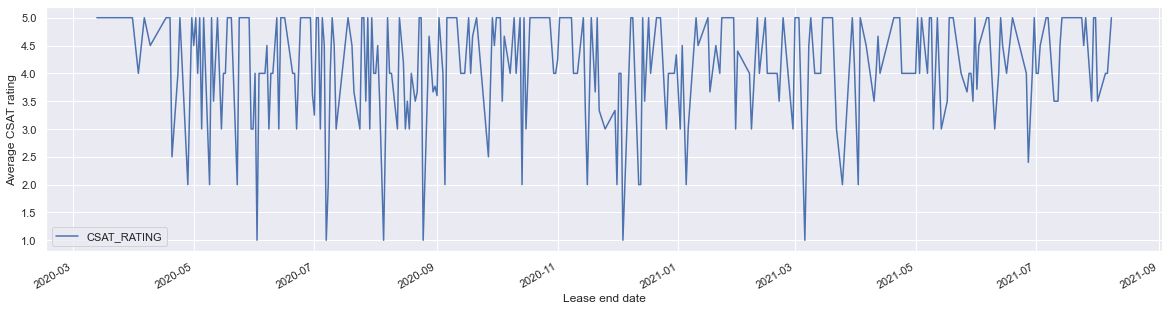

In [8]:
df = score_df.groupby(["LEASE_END"])["CSAT_RATING"].mean().reset_index().sort_values(["LEASE_END"])
df.set_index(["LEASE_END"]).plot()
plt.ylabel("Average CSAT rating")
plt.xlabel("Lease end date")

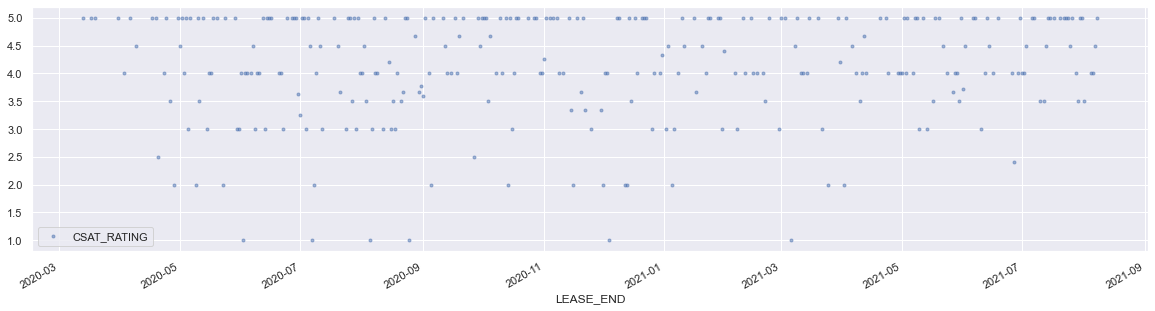

In [9]:
df.set_index(["LEASE_END"]).plot(marker=".", alpha=0.5, linestyle='None')

#### Observation
- The plot tick locations is every two months and labels the month for the x-axis.
- it is hard to read seasonality by month from the plot.

### Check if there is weekly seasonality

In [10]:
df = df.set_index(["LEASE_END"])
df["month"] = df.index.month
df["year"] = df.index.year
df1 = df.groupby(["year", "month"]).count().rename({"CSAT_RATING": "CSAT_RATING_COUNT"})
df1

CSAT_RATING
year month             
2020 3                4
     4               11
     5               20
     6               22
     7               23
     8               23
     9               16
     10              20
     11              16
     12              19
2021 1               17
     2               11
     3               14
     4               13
     5               20
     6               14
     7               21
     8                5

- Most months miss data
- Let's choose '2020-06', '2020-07', '2020-08' to check the seasonality

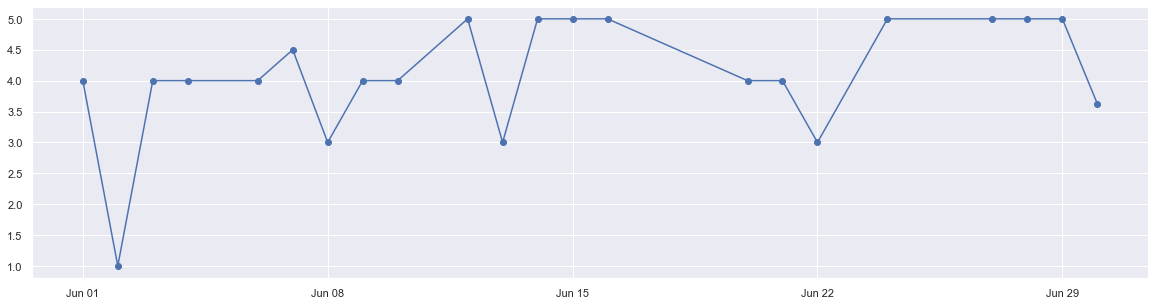

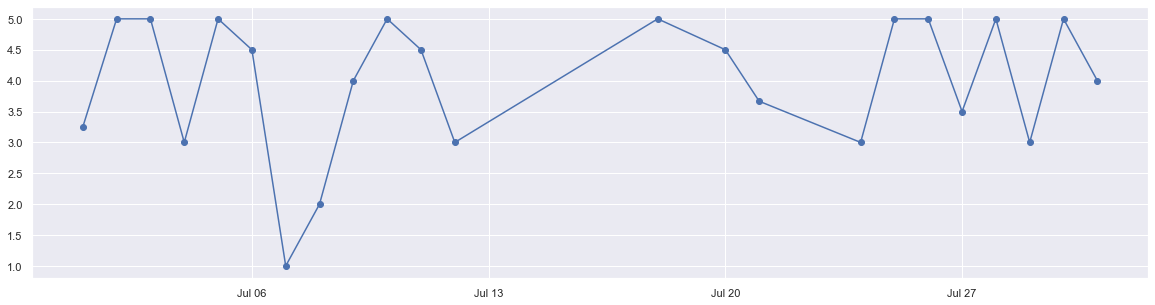

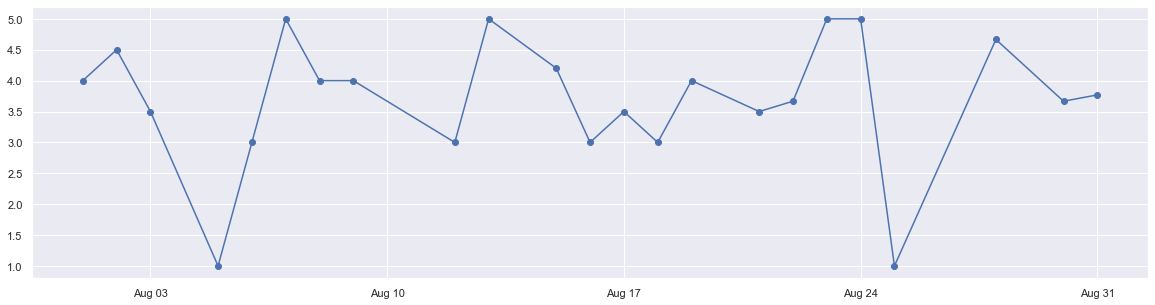

In [54]:
import matplotlib.dates as mdates
for month in ['2020-06', '2020-07', '2020-08']:
    fig, ax = plt.subplots()
    ax.plot(df.loc[month, 'CSAT_RATING'], marker='o', linestyle='-')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

#### Observation
- The while vertical line is monday
- From the three month plots, we can't read any seasonality.
- The dataset miss a lot data each month. We may need more data to do seasonality analysis

### Let furthur explore the seasonality of the data with box plots

In [55]:
df

,CSAT_RATING,month,year
LEASE_END,,,
2020-03-13,5.0,3,2020
2020-03-17,5.0,3,2020
2020-03-19,5.0,3,2020
2020-03-31,5.0,3,2020
2020-04-03,4.0,4,2020
...,...,...,...
2021-08-01,3.5,8,2021
2021-08-05,4.0,8,2021
2021-08-06,4.0,8,2021


In [57]:
df["weekday"] = df.index.weekday

,CSAT_RATING,month,year,weekday
LEASE_END,,,,
2020-03-13,5.0,3,2020,4
2020-03-17,5.0,3,2020,1
2020-03-19,5.0,3,2020,3
2020-03-31,5.0,3,2020,1
2020-04-03,4.0,4,2020,4
...,...,...,...,...
2021-08-01,3.5,8,2021,6
2021-08-05,4.0,8,2021,3
2021-08-06,4.0,8,2021,4


Text(0.5, 1.0, '2020-04 ~ 2020-08')

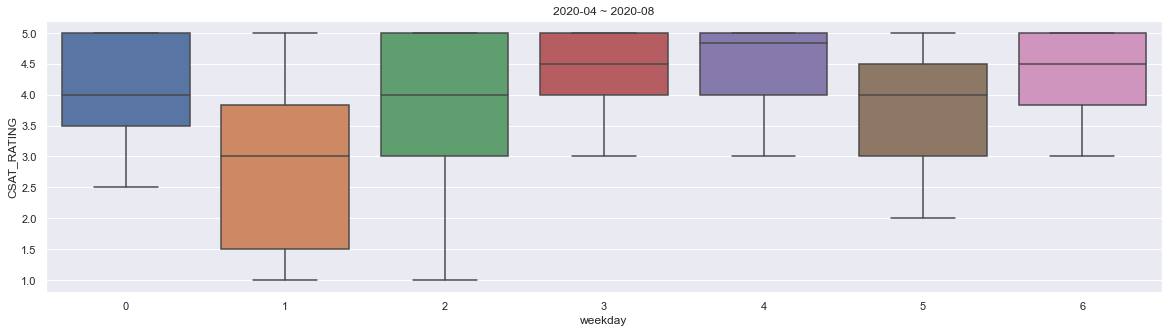

In [61]:
sns.boxplot(data=df['2020-04': '2020-08'], x='weekday', y='CSAT_RATING')
plt.title("2020-04 ~ 2020-08")

Text(0.5, 1.0, '2021-04 ~ 2021-07')

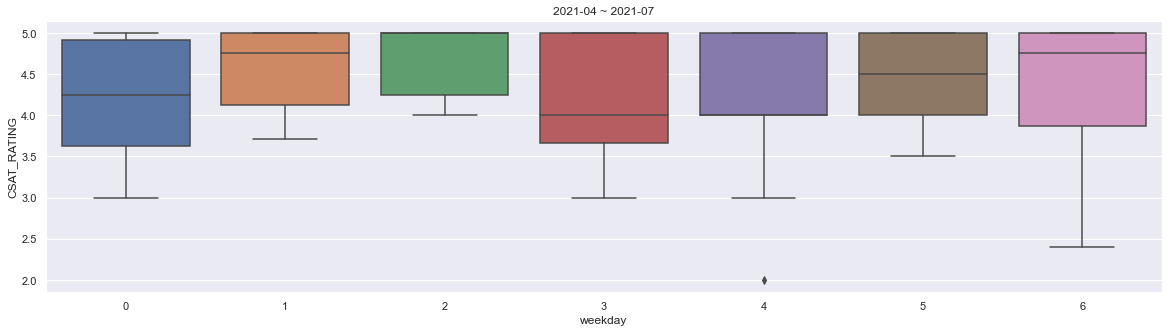

In [62]:
sns.boxplot(data=df['2021-04': '2021-07'], x='weekday', y='CSAT_RATING')
plt.title("2021-04 ~ 2021-07")

#### Observation
- The boxplot function groupes the data by week, then displays the distribution of each group
- We choose two periods to compare the weekly distribution. 2020-04 ~ 2020~08 and 2021-04 ~ 2021 ~07
- The two weekly distribution are different, so we can't read any seasonality from it.